In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

In [3]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [4]:
# 自编码器的数据相似性，我们用来测试的数据仍然是 手写数字

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

In [9]:
input_size = 784
hidden_size = 32
output_size = 784

In [10]:
input = tf.keras.layers.Input(shape=(input_size,))

# Encoder
en = tf.keras.layers.Dense(hidden_size, activation='relu')(input)

# Decoder
de = tf.keras.layers.Dense(output_size, activation='sigmoid')(en)

model = tf.keras.Model(inputs=input, outputs=de)

In [11]:
model.compile(optimizer='adam', loss='mse')

In [12]:
model.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0692 - val_loss: 0.0413
Epoch 2/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0353 - val_loss: 0.0295
Epoch 3/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0264 - val_loss: 0.0231
Epoch 4/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0214 - val_loss: 0.0192
Epoch 5/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0181 - val_loss: 0.0165
Epoch 6/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0159 - val_loss: 0.0147
Epoch 7/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0143 - val_loss: 0.0134
Epoch 8/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0132 - val_loss: 0.0124
Epoch 9/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0124 - va

In [13]:
encode = tf.keras.Model(inputs=input, outputs=en)

In [14]:
input_de = tf.keras.layers.Input(shape=(hidden_size,))
output = model.layers[-1](input_de)
decode = tf.keras.Model(inputs=input_de, outputs=output)

In [15]:
encode_test = encode(x_test)

In [20]:
decode_test = decode.predict(encode_test)

In [24]:
x_test = x_test.numpy()

In [21]:
n = 10  

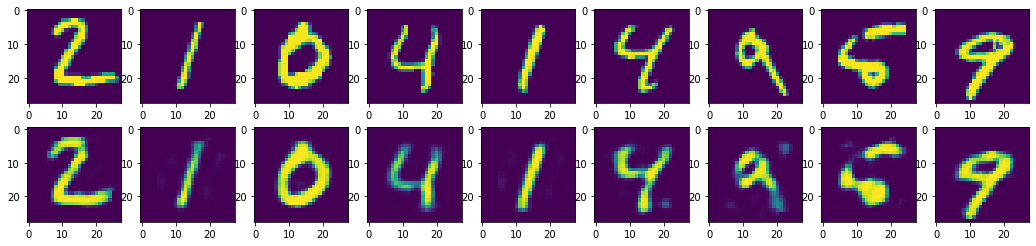

In [26]:
plt.figure(figsize=(20, 4))
for i in range(1, n):    
# 展示原始图像
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))  
    # 展示自编码器重构后的图像
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decode_test[i].reshape(28, 28))
plt.show()